# Chapter 2 End to End Machine Learning Project
### Key steps 
- Look at the big picture
- Get data
- Discover and visualiZe data to gain insights
- Prepare data for ML algorithms
- Select a model to train
- Fine-tune your model
- Present your solution
- Launch, Monitor and Maintain your system

### Framing a problem
What are we predicting? Get the knowledge about the problem we are going to solve.

### Choosing performance measures
**RMSE (Root Mean Square Error)**

Used for single/linear regression

**MAE (Mean Absolute Error)**

Used for multivariate regression

## Practical Task

### Data fetching


In [2]:
import pandas as pd

housing_path = "datasets/housing.csv"
df = pd.read_csv(housing_path)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Data Information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 data instances

**Data Summary**

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Looking at data with histogram**

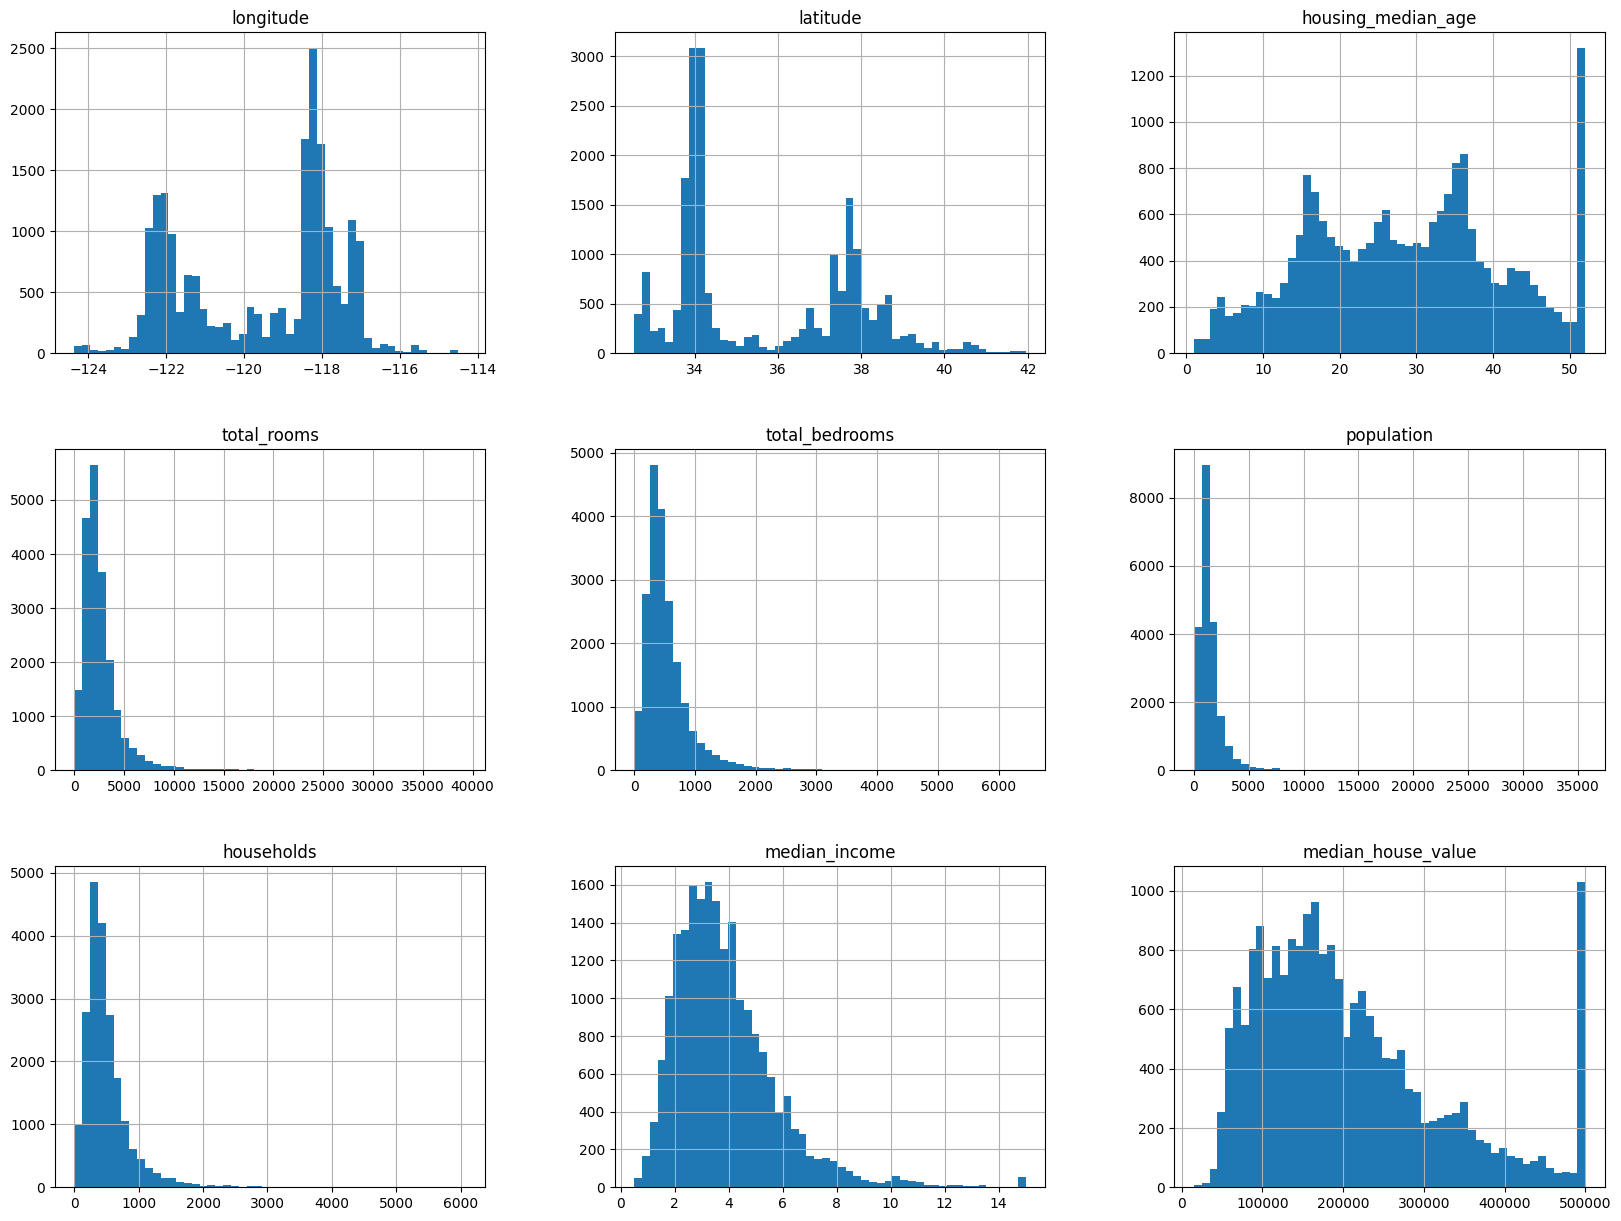

In [5]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## Split, Test, Train
We split data into 20/80 and train the model on 80% of the data then test it with 20% of the remaining data.

**Creating a unique ID for each data instance**

In [6]:
df.insert(0, "id", (df["longitude"] * 1000 + df["latitude"]).astype(int).abs()) #using insert() to add a new column at the start
df.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,122192,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,122182,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,122202,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,122212,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,122212,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Spliting data**

In [7]:
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(df, test_size=0.2, random_state=42)
print(f"train_set rows: {len(train_set)} 80% \ntest_set rows: {len(test_set)}   20%")

train_set rows: 16512 80% 
test_set rows: 4128   20%


**spliting data in 5 categories of median income** 

<Axes: >

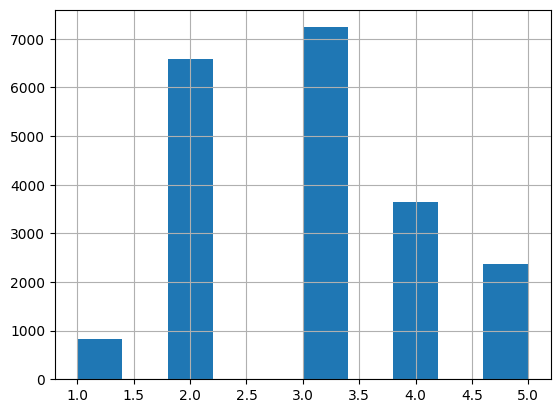

In [8]:
import numpy as np
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
df["income_cat"].hist()

**Startifying according to the Income cat**

Ensures the same proportion of income categories appear in both train and test sets.

<Axes: >

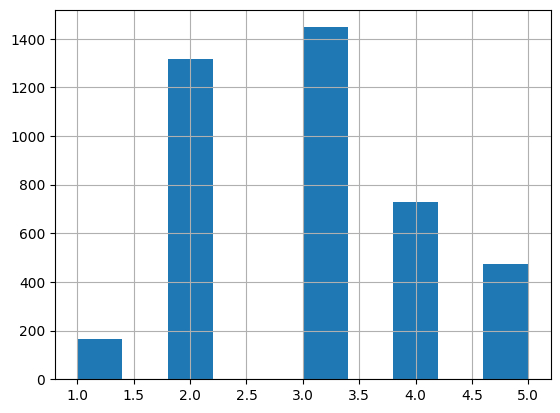

In [9]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["income_cat"])
strat_test_set["income_cat"].hist()

So we can see the histograms are almost identical because percentage of median income is same accross train and test dataframe

**Droping income_cat column**

In [10]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
strat_train_set.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,121421,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,117196,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,119004,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,117097,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,118665,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


## Visualize the Data to Gain Insights

**Showing states**

<Axes: xlabel='longitude', ylabel='latitude'>

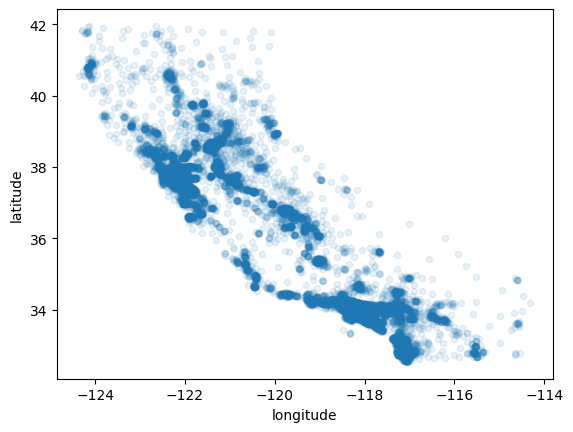

In [11]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

**Showing Population and median house values of the states**

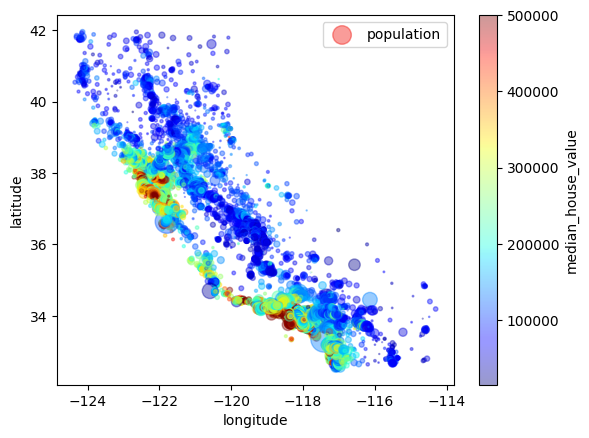

In [12]:
df.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population",
    c="median_house_value", cmap= plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

**Checking for correlations**

In [13]:
corr_matrix = df.select_dtypes(include=[float, int]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
id                    0.046155
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

median_income can be a great predictor because it has possitive correlation

**Scatter Matrix**

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

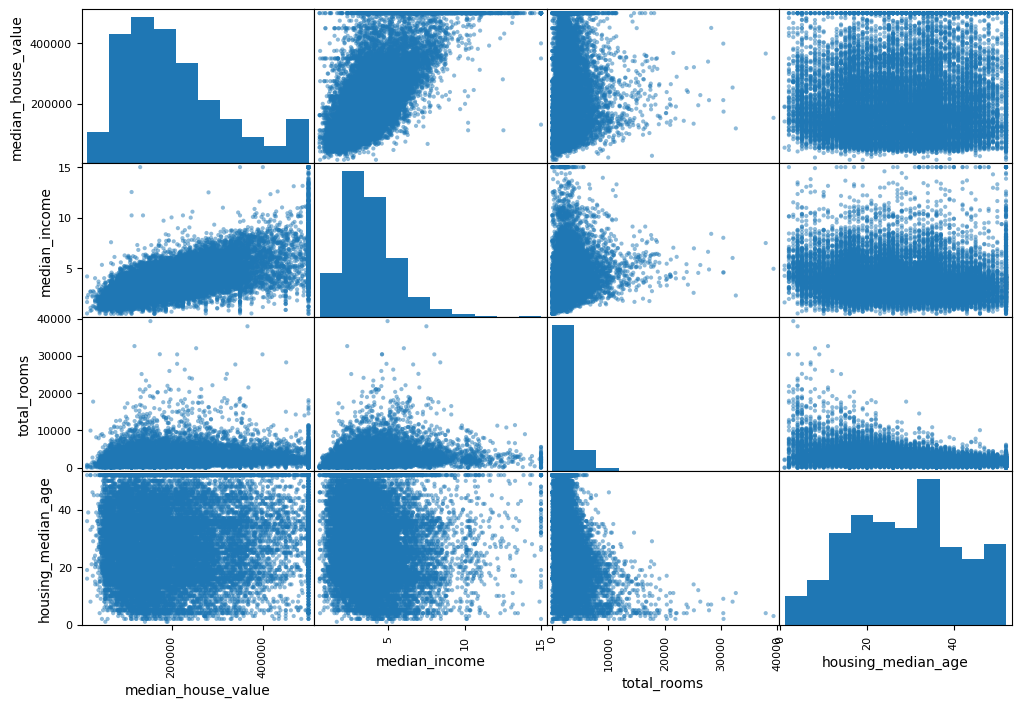

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

This scatter matrix plots every numerical attribute against every other numerical attribute, plus a histogram of each numerical attribute

**Plotting median_income and median_house_value**

<Axes: xlabel='median_income', ylabel='median_house_value'>

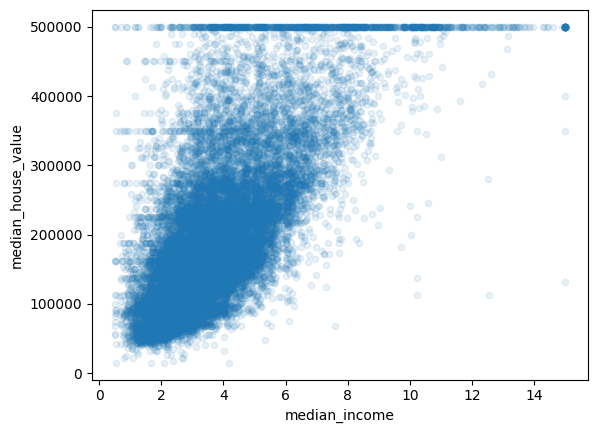

In [15]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

Creating new variables
- The total number of rooms in a district is not very useful if you don’t know how many households there are. 
- The total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms.
- The population per household also seems like an interesting attribute combination to look at.

In [16]:
df["rooms_per_household"]= df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

**Now check correlations again**

In [17]:
corr_matrix = df.select_dtypes(include=[float, int]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False) 

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
id                          0.046155
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

rooms_per_household and bedrooms_per_room both are also correlated to the median_house_value

##  Prepare the Data for Machine Learning Algorithms

**Separating Predictors and Labels**

In [18]:
df = strat_train_set.drop("median_house_value", axis=1)
df_labels = strat_train_set["median_house_value"].copy()

**Data Cleaning**

total_bedrooms attribute has some missing values, so filling it with the median

In [19]:
median = df["total_bedrooms"].median()
df["total_bedrooms"] = df["total_bedrooms"].fillna(median)

**Handling Text and Categorical Attributes**

In [20]:
housing_cat = df["ocean_proximity"]
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

So this is a categorical variable. A ML model works fine with the number so we can convert is to numbers.

**Ordinal Encoder**

In [21]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = df[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [22]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Encoding Categorical Features**
- Tried **OrdinalEncoder**: assigns numbers, but ML may think categories have order (which is wrong here).
- Correct approach: **OneHotEncoder**, since categories are not ordered.

**One Hot Encoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()  #To show sparse matrix

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [24]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Custom transformers**

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class combinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y= None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[: , 3] / X[:,5]
        population_per_household = X[:,4] / X[:,5]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,2] / X[:,3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

**Transformation Pipelines**